## FLAML for hp optimisation and model selection
We use FLAML twice, first to find the best component model for each estimator, and then to optimise the estimators themselves and choose the best estimator. Here we show how it's done

In [1]:
%load_ext autoreload
%autoreload 2
import os, sys
import warnings
warnings.filterwarnings('ignore') # suppress sklearn deprecation warnings for now.. 

import pandas as pd
import numpy as np

# the below checks for whether we run dowhy and auto-causality from source
root_path = root_path = os.path.realpath('../..')
try: 
    import auto_causality
except ModuleNotFoundError:
    sys.path.append(os.path.join(root_path, "auto-causality"))
    
try:
    import dowhy
except ModuleNotFoundError:
    sys.path.append(os.path.join(root_path, "dowhy"))

In [2]:
# this makes the notebook expand to full width of the browser window
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [3]:
%%javascript

// turn off scrollable windows for large output
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [4]:
from auto_causality import AutoCausality
from auto_causality.datasets import synth_ihdp, preprocess_dataset
from auto_causality.scoring import ate, group_ate

### Model fitting & scoring
Here we fit a (selection of) model(s) to the data and score them with the ERUPT metric on held-out data

In [5]:
# import dataset
data_df = synth_ihdp()
data_df, features_X, features_W, targets, treatment = preprocess_dataset(data_df)
outcome = targets[0]

# If you want to use specific estimators, comment in the estimator_list below
# to include any estimators whose full name contains any of the elements of 
# estimator_list
# The other allowed values are 'all' and 'auto', the default is 'auto'
ac = AutoCausality(
    time_budget=1200, 
#     estimator_list=[
#             "Dummy",
#             "SparseLinearDML",
#             "ForestDRLearner",
#             "TransformedOutcome",
#             "CausalForestDML",
#             ".LinearDML",
#             "DomainAdaptationLearner",
#             "SLearner",
#             "XLearner",
#             "TLearner",
#             "Ortho",
#         ],
    metric="norm_erupt", 
    verbose=3,
    components_verbose=2,
    components_time_budget=60,
)

# run autocausality
myresults = ac.fit(data_df, treatment, outcome, features_W, features_X)

# return best estimator
print(f"Best estimator: {ac.best_estimator}")
# config of best estimator:
print(f"best config: {ac.best_config}")
# best score:
print(f"best score: {ac.best_score}")


[flaml.tune.tune: 04-11 14:15:37] {326} WARNING - Using CFO for search. To use BlendSearch, run: pip install flaml[blendsearch]
[flaml.tune.tune: 04-11 14:15:37] {447} INFO - trial 1 config: {'estimator': {'estimator_name': 'backdoor.auto_causality.models.Dummy'}}


Initial configs: [{'estimator': {'estimator_name': 'backdoor.auto_causality.models.Dummy'}}, {'estimator': {'estimator_name': 'backdoor.econml.metalearners.SLearner'}}, {'estimator': {'estimator_name': 'backdoor.econml.metalearners.DomainAdaptationLearner'}}, {'estimator': {'estimator_name': 'backdoor.econml.dr.ForestDRLearner', 'min_propensity': 1e-06, 'n_estimators': 1000, 'min_samples_split': 5, 'min_samples_leaf': 5, 'min_weight_fraction_leaf': 0.0, 'max_features': 'auto', 'min_impurity_decrease': 0.0, 'max_samples': 0.45, 'min_balancedness_tol': 0.45, 'honest': True, 'subforest_size': 4}}, {'estimator': {'estimator_name': 'backdoor.econml.dml.CausalForestDML', 'drate': True, 'n_estimators': 100, 'criterion': 'mse', 'min_samples_split': 10, 'min_samples_leaf': 5, 'min_weight_fraction_leaf': 0.0, 'max_features': 'auto', 'min_impurity_decrease': 0.0, 'max_samples': 0.45, 'min_balancedness_tol': 0.45, 'honest': True, 'fit_intercept': True, 'subforest_size': 4}}, {'estimator': {'estima

[flaml.tune.tune: 04-11 14:16:24] {108} INFO - result: {'norm_erupt': 2.4293900695707142, 'estimator': <dowhy.causal_estimator.CausalEstimate object at 0x000002761F642880>, 'estimator_name': 'backdoor.auto_causality.models.Dummy', 'scores': {'train': {'erupt': 6.411388102952429, 'norm_erupt': 2.298271875727379, 'qini': 0.0031090478655491885, 'auc': 0.49899033087438527, 'ate': 4.012466038959694, 'intrp': <econml.cate_interpreter._interpreters.SingleTreeCateInterpreter object at 0x000002761F670430>, 'values':      treated  y_factual        p  policy  norm_policy   weights
0        0.0   6.875856  0.18593    True         True  0.000000
1        0.0   2.754591  0.18593    True        False  0.000000
2        1.0   8.141129  0.18593    True        False  5.378378
3        0.0   0.924096  0.18593    True        False  0.000000
4        1.0   5.861061  0.18593    True        False  5.378378
..       ...        ...      ...     ...          ...       ...
592      1.0   5.501678  0.18593    Tru

{'estimator_name': 'backdoor.econml.metalearners.SLearner'}


[flaml.tune.tune: 04-11 14:18:09] {108} INFO - result: {'norm_erupt': 2.818655905529848, 'estimator': <dowhy.causal_estimator.CausalEstimate object at 0x000002761F67C100>, 'estimator_name': 'backdoor.econml.metalearners.SLearner', 'scores': {'train': {'erupt': 6.4122394316449105, 'norm_erupt': 2.6819177356240123, 'qini': 0.06700172565710873, 'auc': 0.5509268259445695, 'ate': 3.8203673961846745, 'intrp': <econml.cate_interpreter._interpreters.SingleTreeCateInterpreter object at 0x000002761FBB8F70>, 'values':      treated  y_factual        p  policy  norm_policy   weights
0        0.0   6.875856  0.18593    True        False  0.000000
1        0.0   2.754591  0.18593    True        False  0.000000
2        1.0   8.141129  0.18593    True        False  5.382569
3        0.0   0.924096  0.18593    True         True  0.000000
4        1.0   5.861061  0.18593    True        False  5.382569
..       ...        ...      ...     ...          ...       ...
592      1.0   5.501678  0.18593    Tru

{'estimator_name': 'backdoor.econml.metalearners.DomainAdaptationLearner'}


[flaml.tune.tune: 04-11 14:21:10] {108} INFO - result: {'norm_erupt': 2.8612495146310724, 'estimator': <dowhy.causal_estimator.CausalEstimate object at 0x000002761F6AC820>, 'estimator_name': 'backdoor.econml.metalearners.DomainAdaptationLearner', 'scores': {'train': {'erupt': 6.418526734365964, 'norm_erupt': 2.7705712020993523, 'qini': 0.08019399651700608, 'auc': 0.5638591759184192, 'ate': 3.9319664207591334, 'intrp': <econml.cate_interpreter._interpreters.SingleTreeCateInterpreter object at 0x0000027627153A90>, 'values':      treated  y_factual        p  policy  norm_policy   weights
0        0.0   6.875856  0.18593    True        False  0.000000
1        0.0   2.754591  0.18593    True        False  0.000000
2        1.0   8.141129  0.18593    True         True  5.360492
3        0.0   0.924096  0.18593    True         True  0.000000
4        1.0   5.861061  0.18593    True        False  5.360492
..       ...        ...      ...     ...          ...       ...
592      1.0   5.501678 

{'estimator_name': 'backdoor.econml.dr.ForestDRLearner', 'min_propensity': 1e-06, 'n_estimators': 1000, 'min_samples_split': 5, 'min_samples_leaf': 5, 'min_weight_fraction_leaf': 0.0, 'max_features': 'auto', 'min_impurity_decrease': 0.0, 'max_samples': 0.45, 'min_balancedness_tol': 0.45, 'honest': 1, 'subforest_size': 4}


[flaml.tune.tune: 04-11 14:23:13] {108} INFO - result: {'norm_erupt': 2.782801343664532, 'estimator': <dowhy.causal_estimator.CausalEstimate object at 0x000002761F7B81C0>, 'estimator_name': 'backdoor.econml.dr.ForestDRLearner', 'scores': {'train': {'erupt': 6.411388102952429, 'norm_erupt': 2.8390141278556458, 'qini': 0.07483637139678131, 'auc': 0.5812076279200502, 'ate': 3.9708611634288786, 'intrp': <econml.cate_interpreter._interpreters.SingleTreeCateInterpreter object at 0x000002762926EB20>, 'values':      treated  y_factual        p  policy  norm_policy   weights
0        0.0   6.875856  0.18593    True        False  0.000000
1        0.0   2.754591  0.18593    True        False  0.000000
2        1.0   8.141129  0.18593    True         True  5.378378
3        0.0   0.924096  0.18593    True         True  0.000000
4        1.0   5.861061  0.18593    True         True  5.378378
..       ...        ...      ...     ...          ...       ...
592      1.0   5.501678  0.18593    True   

{'estimator_name': 'backdoor.econml.dml.CausalForestDML', 'drate': 1, 'n_estimators': 100, 'criterion': 'mse', 'min_samples_split': 10, 'min_samples_leaf': 5, 'min_weight_fraction_leaf': 0.0, 'max_features': 'auto', 'min_impurity_decrease': 0.0, 'max_samples': 0.45, 'min_balancedness_tol': 0.45, 'honest': 1, 'fit_intercept': 1, 'subforest_size': 4}


[flaml.tune.tune: 04-11 14:25:14] {108} INFO - result: {'norm_erupt': 2.7846283371031433, 'estimator': <dowhy.causal_estimator.CausalEstimate object at 0x000002761F71A1F0>, 'estimator_name': 'backdoor.econml.dml.CausalForestDML', 'scores': {'train': {'erupt': 6.411388102952429, 'norm_erupt': 2.8729777569602906, 'qini': 0.13600930838663916, 'auc': 0.5678347238371794, 'ate': 3.8564399444551904, 'intrp': <econml.cate_interpreter._interpreters.SingleTreeCateInterpreter object at 0x00000276274FCA90>, 'values':      treated  y_factual        p  policy  norm_policy   weights
0        0.0   6.875856  0.18593    True        False  0.000000
1        0.0   2.754591  0.18593    True        False  0.000000
2        1.0   8.141129  0.18593    True        False  5.378378
3        0.0   0.924096  0.18593    True         True  0.000000
4        1.0   5.861061  0.18593    True        False  5.378378
..       ...        ...      ...     ...          ...       ...
592      1.0   5.501678  0.18593    True 

{'estimator_name': 'backdoor.auto_causality.models.TransformedOutcome'}


[flaml.tune.tune: 04-11 14:26:14] {108} INFO - result: {'norm_erupt': 2.775008043861227, 'estimator': <dowhy.causal_estimator.CausalEstimate object at 0x000002761FEF39D0>, 'estimator_name': 'backdoor.auto_causality.models.TransformedOutcome', 'scores': {'train': {'erupt': 5.620442536152722, 'norm_erupt': 2.993123272280884, 'qini': 0.3379132759428926, 'auc': 0.5149593727816163, 'ate': 3.416387, 'intrp': <econml.cate_interpreter._interpreters.SingleTreeCateInterpreter object at 0x00000276273BF4C0>, 'values':      treated  y_factual        p  policy  norm_policy   weights
0        0.0   6.875856  0.18593   False        False  0.959807
1        0.0   2.754591  0.18593    True         True  0.000000
2        1.0   8.141129  0.18593    True         True  4.202399
3        0.0   0.924096  0.18593    True         True  0.000000
4        1.0   5.861061  0.18593    True         True  4.202399
..       ...        ...      ...     ...          ...       ...
592      1.0   5.501678  0.18593    True

{'estimator_name': 'backdoor.econml.dr.ForestDRLearner', 'min_propensity': 0.013178313041739104, 'n_estimators': 138, 'min_samples_split': 15, 'min_samples_leaf': 15, 'min_weight_fraction_leaf': 0.1325626035099236, 'max_features': 'auto', 'min_impurity_decrease': 0.7908834768251549, 'max_samples': 0.1402860493973726, 'min_balancedness_tol': 0.23926950979760564, 'honest': 1, 'subforest_size': 5}


[flaml.tune.tune: 04-11 14:28:15] {108} INFO - result: {'norm_erupt': 2.4620656266686396, 'estimator': <dowhy.causal_estimator.CausalEstimate object at 0x000002761FEE7D90>, 'estimator_name': 'backdoor.econml.dr.ForestDRLearner', 'scores': {'train': {'erupt': 6.411388102952429, 'norm_erupt': 2.3985523606608217, 'qini': 0.017244639047670093, 'auc': 0.5279308518896991, 'ate': 3.9185435420667725, 'intrp': <econml.cate_interpreter._interpreters.SingleTreeCateInterpreter object at 0x0000027627B119D0>, 'values':      treated  y_factual        p  policy  norm_policy   weights
0        0.0   6.875856  0.18593    True        False  0.000000
1        0.0   2.754591  0.18593    True        False  0.000000
2        1.0   8.141129  0.18593    True        False  5.378378
3        0.0   0.924096  0.18593    True        False  0.000000
4        1.0   5.861061  0.18593    True        False  5.378378
..       ...        ...      ...     ...          ...       ...
592      1.0   5.501678  0.18593    True 

{'estimator_name': 'backdoor.econml.dr.ForestDRLearner', 'min_propensity': 0.01158200543939812, 'n_estimators': 103, 'min_samples_split': 17, 'min_samples_leaf': 14, 'min_weight_fraction_leaf': 0.1026108813499224, 'max_features': 'sqrt', 'min_impurity_decrease': 1.9115779883838422, 'max_samples': 0.07298056979810333, 'min_balancedness_tol': 0.2774764833898389, 'honest': 1, 'subforest_size': 5}


[flaml.tune.tune: 04-11 14:30:16] {108} INFO - result: {'norm_erupt': 2.4620656266686396, 'estimator': <dowhy.causal_estimator.CausalEstimate object at 0x000002761FE4B760>, 'estimator_name': 'backdoor.econml.dr.ForestDRLearner', 'scores': {'train': {'erupt': 6.411388102952429, 'norm_erupt': 2.3985526003279176, 'qini': 0.020799740696272016, 'auc': 0.49601200955100483, 'ate': 4.0247062748433855, 'intrp': <econml.cate_interpreter._interpreters.SingleTreeCateInterpreter object at 0x0000027627F79760>, 'values':      treated  y_factual        p  policy  norm_policy   weights
0        0.0   6.875856  0.18593    True         True  0.000000
1        0.0   2.754591  0.18593    True         True  0.000000
2        1.0   8.141129  0.18593    True         True  5.378378
3        0.0   0.924096  0.18593    True         True  0.000000
4        1.0   5.861061  0.18593    True         True  5.378378
..       ...        ...      ...     ...          ...       ...
592      1.0   5.501678  0.18593    True

{'estimator_name': 'backdoor.econml.dr.ForestDRLearner', 'min_propensity': 0.014994634179268346, 'n_estimators': 173, 'min_samples_split': 13, 'min_samples_leaf': 16, 'min_weight_fraction_leaf': 0.1625143256699248, 'max_features': 'auto', 'min_impurity_decrease': 0, 'max_samples': 0.20759152899664188, 'min_balancedness_tol': 0.2010625362053724, 'honest': 1, 'subforest_size': 5}


[flaml.tune.tune: 04-11 14:32:16] {108} INFO - result: {'norm_erupt': 2.3111722916539046, 'estimator': <dowhy.causal_estimator.CausalEstimate object at 0x00000276272424F0>, 'estimator_name': 'backdoor.econml.dr.ForestDRLearner', 'scores': {'train': {'erupt': 6.411388102952429, 'norm_erupt': 2.5313640838022344, 'qini': 0.008780854015113321, 'auc': 0.5408490260761705, 'ate': 3.972149126667891, 'intrp': <econml.cate_interpreter._interpreters.SingleTreeCateInterpreter object at 0x00000276280EAC70>, 'values':      treated  y_factual        p  policy  norm_policy   weights
0        0.0   6.875856  0.18593    True        False  0.000000
1        0.0   2.754591  0.18593    True        False  0.000000
2        1.0   8.141129  0.18593    True        False  5.378378
3        0.0   0.924096  0.18593    True         True  0.000000
4        1.0   5.861061  0.18593    True        False  5.378378
..       ...        ...      ...     ...          ...       ...
592      1.0   5.501678  0.18593    True  

{'estimator_name': 'backdoor.econml.dr.ForestDRLearner', 'min_propensity': 0.01014169244831791, 'n_estimators': 117, 'min_samples_split': 15, 'min_samples_leaf': 13, 'min_weight_fraction_leaf': 0.04756134828957845, 'max_features': 'log2', 'min_impurity_decrease': 1.6940747970734116, 'max_samples': 0.14397441233868571, 'min_balancedness_tol': 0.2734172144216945, 'honest': 1, 'subforest_size': 5}


[flaml.tune.tune: 04-11 14:34:17] {108} INFO - result: {'norm_erupt': 2.4620656266686396, 'estimator': <dowhy.causal_estimator.CausalEstimate object at 0x000002762738D9A0>, 'estimator_name': 'backdoor.econml.dr.ForestDRLearner', 'scores': {'train': {'erupt': 6.411388102952429, 'norm_erupt': 2.3985523606608217, 'qini': -0.05943287544871864, 'auc': 0.5069073636777398, 'ate': 3.9223226653294327, 'intrp': <econml.cate_interpreter._interpreters.SingleTreeCateInterpreter object at 0x00000276293F1670>, 'values':      treated  y_factual        p  policy  norm_policy   weights
0        0.0   6.875856  0.18593    True        False  0.000000
1        0.0   2.754591  0.18593    True        False  0.000000
2        1.0   8.141129  0.18593    True        False  5.378378
3        0.0   0.924096  0.18593    True        False  0.000000
4        1.0   5.861061  0.18593    True        False  5.378378
..       ...        ...      ...     ...          ...       ...
592      1.0   5.501678  0.18593    True 

{'estimator_name': 'backdoor.econml.dr.ForestDRLearner', 'min_propensity': 0.017124157088285137, 'n_estimators': 159, 'min_samples_split': 15, 'min_samples_leaf': 17, 'min_weight_fraction_leaf': 0.21756385873026876, 'max_features': 'auto', 'min_impurity_decrease': 0, 'max_samples': 0.1365976864560595, 'min_balancedness_tol': 0.2051218051735168, 'honest': 1, 'subforest_size': 5}


[flaml.tune.tune: 04-11 14:36:18] {108} INFO - result: {'norm_erupt': 2.3821209602709295, 'estimator': <dowhy.causal_estimator.CausalEstimate object at 0x00000276274B4640>, 'estimator_name': 'backdoor.econml.dr.ForestDRLearner', 'scores': {'train': {'erupt': 6.411388102952429, 'norm_erupt': 2.264410852903451, 'qini': -0.025199870407829453, 'auc': 0.5355938655950728, 'ate': 3.958081739672494, 'intrp': <econml.cate_interpreter._interpreters.SingleTreeCateInterpreter object at 0x0000027629848F40>, 'values':      treated  y_factual        p  policy  norm_policy   weights
0        0.0   6.875856  0.18593    True        False  0.000000
1        0.0   2.754591  0.18593    True        False  0.000000
2        1.0   8.141129  0.18593    True        False  5.378378
3        0.0   0.924096  0.18593    True         True  0.000000
4        1.0   5.861061  0.18593    True        False  5.378378
..       ...        ...      ...     ...          ...       ...
592      1.0   5.501678  0.18593    True  

Best estimator: backdoor.econml.metalearners.DomainAdaptationLearner
best config: {'estimator': {'estimator_name': 'backdoor.econml.metalearners.DomainAdaptationLearner'}}
best score: 2.8612495146310724


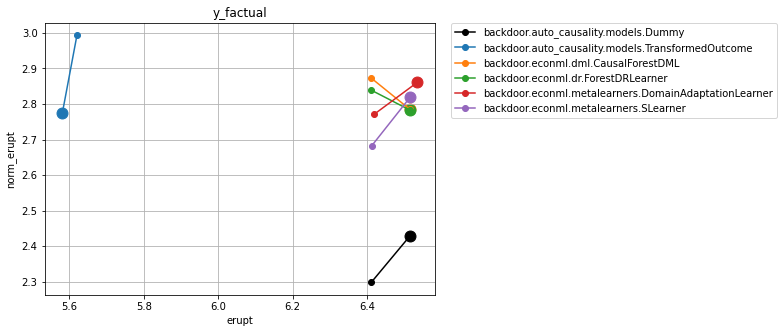

In [6]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

colors = ([matplotlib.colors.CSS4_COLORS['black']] +
    list(matplotlib.colors.TABLEAU_COLORS) + [
    matplotlib.colors.CSS4_COLORS['lime'],
    matplotlib.colors.CSS4_COLORS['yellow'],
    matplotlib.colors.CSS4_COLORS['pink']
])


plt.figure(figsize = (7,5))
plt.title(outcome)

m1 = "erupt"
m2 = "norm_erupt"

for (est, scr), col in zip(ac.scores.items(),colors):
    try:
        sc = [scr["scores"]['train'][m1], scr["scores"]['validation'][m1]]
        crv = [scr["scores"]['train'][m2], scr["scores"]['validation'][m2]]
        plt.plot(sc, crv, color=col, marker="o")
        plt.scatter(sc[1:],crv[1:], c=col, s=120 )
    except:
        pass
plt.xlabel(m1)
plt.ylabel(m2)

plt.legend(ac.scores.keys(),bbox_to_anchor=(1.04,1), borderaxespad=0)

plt.grid()
plt.show()


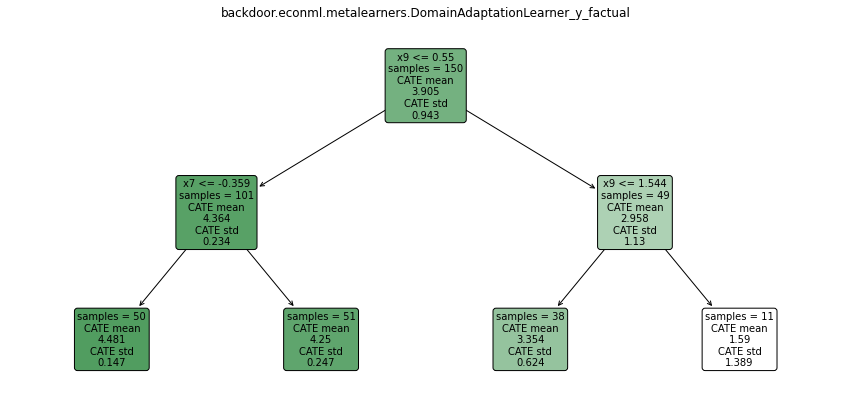

In [7]:
scr = ac.scores[ac.best_estimator]
intrp = scr["scores"]['validation']['intrp']
plt.figure(figsize=(15, 7))
intrp.plot(feature_names=intrp.feature_names, fontsize=10)
plt.title(f"{ac.best_estimator}_{outcome}")
plt.show()


y_factual backdoor.econml.metalearners.DomainAdaptationLearner


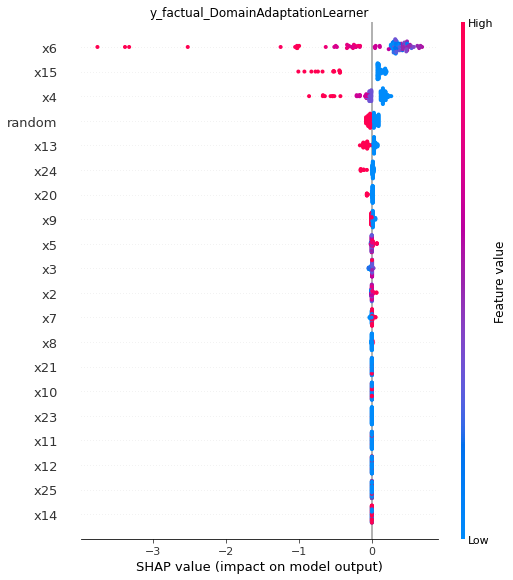

In [8]:
# TODO: add SHAP plots!
import matplotlib.pyplot as plt
import shap

# and now let's visualize feature importances!
from auto_causality.shap import shap_values

# Shapley values calculation can be slow so let's subsample
this_df = ac.test_df.sample(100)


scr = ac.scores[ac.best_estimator]
print(outcome, ac.best_estimator)
est = ac.model
shaps = shap_values(est, this_df)

plt.title(outcome + '_' + ac.best_estimator.split('.')[-1])
shap.summary_plot(shaps, this_df[est.estimator._effect_modifier_names])
plt.show()


,policy,mean,std,count
0,all,4.053720,0.245139,150
1,True,4.698616,0.310172,94
2,False,2.945116,0.364068,56


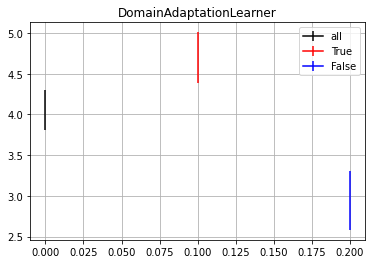

In [9]:
from auto_causality.scoring import  group_ate
# plot out-of sample difference of outcomes between treated and untreated for the points where a model predicts positive vs negative impact
my_est = ac.best_estimator
stats = []

v = ac.scores[my_est]['scores']['validation']['values']

sts = group_ate(v['treated'], v[outcome], v['norm_policy'])

display(sts)


colors = (matplotlib.colors.CSS4_COLORS['black'],
    matplotlib.colors.CSS4_COLORS['red'],
    matplotlib.colors.CSS4_COLORS['blue'])

grp = sts["policy"].unique()

for i,(p,c) in enumerate(zip(grp, colors)):
    st = sts[sts["policy"] == p]
    plt.errorbar(np.array(range(len(st))) +0.1*i, st["mean"].values[0],  yerr = st["std"].values[0], color=c)
plt.legend(grp)
plt.grid(True)
plt.title(my_est.split('.')[-1])
plt.show()